In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
%matplotlib inline

In [3]:
# import data
df_train = pd.read_csv('train.csv')

In [4]:
# df_train.info

In [5]:
# drop id column
id_train = df_train['Id']

df_train = df_train.drop('Id', axis = 1)

In [6]:
# save and drop SalePrice column
SalePrice = df_train['SalePrice']

df_train = df_train.drop('SalePrice', axis = 1)

# PreProcessing

In [7]:
# //////////////////     4.   Analyzing types of data and Manipulating.  //////////////////


In [8]:
# --------------- 4.1. Originally a categorical data ------ 

In [9]:
# since 'MSSubClass' is originally a categorical data, so we need to convert it to character
# then in Categorical Part we will do lable encoding operation on it.

item1 = ['SC20', 'SC30', 'SC40', 'SC45', 'SC50', 'SC60', 'SC70', 'SC75', 'SC80', 'SC85', 'SC90', 'SC120', 'SC150', 'SC160', 'SC180', 'SC190']
item2 = [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]

df_train['MSSubClass'].replace(to_replace=item1, value=item2)


0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [10]:
df_train['MSSubClass'][:5]

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

### --------------- 4.2. Feature combination ------ 

In [11]:
# Combinations of some features that have same meaning to avoid dimension issue:

#    4.2.1.    Creating Total number of bathrooms (TotalBath) by Combinations of four features 

df_train["TotalBath"] = df_train["BsmtFullBath"] + (0.5 * df_train["BsmtHalfBath"]) + df_train["FullBath"] + (0.5 * df_train["HalfBath"])

print(df_train.shape)
print(df_train["TotalBath"][:3])

# deleting above used features from dataset, then assign to df_train again
df_train = df_train.drop(["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1)
print(df_train.shape)

(1460, 80)
0    3.5
1    2.5
2    3.5
Name: TotalBath, dtype: float64
(1460, 76)


In [12]:
# 4.2.2. Creating Total square feet of porch area (AllPorchSF) by Combinations of four following features:

df_train["AllPorchSF"] = df_train["OpenPorchSF"] + df_train["EnclosedPorch"] + df_train["3SsnPorch"] + df_train["ScreenPorch"]
print(df_train["AllPorchSF"])
print(df_train.shape)

# Deleting above used features from the dataset
df_train = df_train.drop(["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"], axis=1)
print(df_train.shape)

0        61
1         0
2        42
3       307
4        84
       ... 
1455     40
1456      0
1457     60
1458    112
1459     68
Name: AllPorchSF, Length: 1460, dtype: int64
(1460, 77)
(1460, 73)


In [13]:
# --------------- 4.3. Discovering numerical value which originally categorical ------ 

# In dataset exist some features that have numerical values, but actually they are categorical data,
#  so first, before any operation on numerical data we need to separate them from numerical data and
#  create a sub-dataset for them (original_cat_dataset), then in next steps when we already
# operate Encoding on categorical data, we will add this sub-dataset to categorical sub-dataset.

# these features are:
# TotalBath     # new created features. total number of Bath
# OverallQual   # Overall material and finish quality
# OverallCond   # Overall condition rating
# BedroomAbvGr  # Number of bedrooms above basement level
# TotRmsAbvGrd  # Total rooms above grade
# Fireplaces    # Number of fireplaces
# GarageCars    # Size of garage in car capacity. number of cars that can park
# MoSold        # month sold
# KitchenAbvGr  # Number of Kitchens above grade



In [14]:
# creating sub-dataset for these features:
original_cat_dataset = df_train[["TotalBath", "OverallQual", "OverallCond", "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold", "KitchenAbvGr"]]
print(original_cat_dataset.shape)
print(original_cat_dataset[:3])

(1460, 9)
   TotalBath  OverallQual  OverallCond  BedroomAbvGr  TotRmsAbvGrd  \
0        3.5            7            5             3             8   
1        2.5            6            8             3             6   
2        3.5            7            5             3             6   

   Fireplaces  GarageCars  MoSold  KitchenAbvGr  
0           0           2       2             1  
1           1           2       5             1  
2           1           2       9             1  


In [15]:
# deleting these features from original dataset (data) then creating new dataset without them. "data2"
df_train = df_train.drop(["TotalBath", "OverallQual", "OverallCond", "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold", "KitchenAbvGr"], axis = 1)
df_train.shape

(1460, 64)

# ////////////////////    5.    Separating Numerical and Categorical features  ///////


In [17]:
# Here we get name of the features that have 'numeric' values and 'categorical' values, 
# and create sub-dataset for each of them

# Determining numerical features
num_features = df_train.select_dtypes(include = 'number').columns
print(num_features)

# Determining categorical features
cat_features = df_train.select_dtypes(include='object').columns
print(cat_features)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'YrSold',
       'AllPorchSF'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='obje

In [18]:
# creating sub-dataset for "numerical" features
numeric_data = df_train[num_features]

# creating sub-dataset for "categorical" features
categorical_data = df_train[cat_features]

# checking dimension of both
print(categorical_data.shape)
print(numeric_data.shape)

(1460, 43)
(1460, 21)


# /////////////////////////      6.    Missing data handling -    /////////////////////////

In [19]:
# /////////////////////////      6.    Missing data handling -    /////////////////////////

# We have Two strategy: 1. imputing  2. removing missing values

In [20]:
# ------------       6. 1.    Not exist data ---------

# Having quick review I found In this dataset some missing data are not missing, although their values
# are 'NA' but this means amount is zero. For example for FireplaceQu (Fireplace quality)
# 'NA' means 'No Fireplace' which we need to put them to unknown or put 0 by imputing manually.
# then adding them to categorical data

# These features are: GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond

# ---  First Step: Replacing 'NA' values in these columns with "None" - then next stem encoding them

categorical_data['GarageFinish'] = categorical_data['GarageFinish'].replace(to_replace = np.nan , value = "None")

C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/1224723464.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['GarageFinish'] = categorical_data['GarageFinish'].replace(to_replace = np.nan , value = "None")


In [21]:
categorical_data['GarageFinish'].isnull().sum()

0

In [22]:
categorical_data['GarageQual'] = categorical_data['GarageQual'].replace(to_replace = np.nan , value = "None")
categorical_data['GarageCond'] = categorical_data['GarageCond'].replace(to_replace = np.nan , value = "None")
categorical_data['BsmtQual'] = categorical_data['BsmtQual'].replace(to_replace = np.nan , value = "None")
categorical_data['BsmtCond'] = categorical_data['BsmtCond'].replace(to_replace = np.nan , value = "None")

C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/3256833225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['GarageQual'] = categorical_data['GarageQual'].replace(to_replace = np.nan , value = "None")
C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/3256833225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['GarageCond'] = categorical_data['GarageCond'].replace(to_replace = np.nan , value = "None")
C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/3256833225.py:3:

In [23]:
# ---  Second Step: Replacing 'None' values with 0 - and encoding other categories too.


In [24]:
# First method 
categorical_data['GarageFinish'] = categorical_data['GarageFinish'].replace(to_replace = ['None', 'Unf', 'RFn', 'Fin' ] , value = [0,1,2,3])
categorical_data['GarageFinish'][:3]

C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/1664039131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['GarageFinish'] = categorical_data['GarageFinish'].replace(to_replace = ['None', 'Unf', 'RFn', 'Fin' ] , value = [0,1,2,3])


0    2
1    2
2    2
Name: GarageFinish, dtype: int64

In [25]:
# Second method

categorical_data['GarageQual'] = categorical_data['GarageQual'].replace({
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

categorical_data['GarageCond'] = categorical_data['GarageCond'].replace({
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

categorical_data['BsmtQual'] = categorical_data['BsmtQual'].replace({
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

categorical_data['BsmtCond'] = categorical_data['BsmtCond'].replace({
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/3312978171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['GarageQual'] = categorical_data['GarageQual'].replace({
C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/3312978171.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['GarageCond'] = categorical_data['GarageCond'].replace({
C:\Users\shoja\AppData\Local\Temp/ipykernel_19120/3312978171.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [26]:
categorical_data['BsmtCond'][:5]

0    3
1    3
2    3
3    4
4    3
Name: BsmtCond, dtype: int64

In [27]:
#  ------   Third Step:    Deleting above used features:

# deleting these features from catogorical sub-dataset, then adding to original_cat_dataset which is 
# sub-dataset that contains features with integer data while originally they have categorical type. 
# creating sub-dataset for these variable in order to combine with last "original_cat_dataset":

# creating new original_cat_dataset2 for these features to add to previous 'original_cat_dataset':
original_cat_dataset2 = categorical_data[["GarageFinish", "GarageQual", "GarageCond", "BsmtCond", "BsmtQual"]]
original_cat_dataset2


,GarageFinish,GarageQual,GarageCond,BsmtCond,BsmtQual
0,2,3,3,3,4
1,2,3,3,3,4
2,2,3,3,3,4
3,1,3,3,4,3
4,2,3,3,3,4
...,...,...,...,...,...
1455,2,3,3,3,4
1456,1,3,3,3,4
1457,2,3,3,4,3
1458,1,3,3,3,3


In [28]:
# Adding above new sub-dataset to the previous 'original_cat_dataset' sub-dataset:
original_cat_dataset = pd.concat([original_cat_dataset, original_cat_dataset2], axis=1)
print(original_cat_dataset.shape)

(1460, 14)


In [29]:
# Deleting the specified features from the 'categorical_data' sub-dataset to avoid duplication
categorical_data = categorical_data.drop(["GarageFinish", "GarageQual", "GarageCond", "BsmtCond", "BsmtQual"], axis=1)
print(categorical_data.shape)

(1460, 38)


In [30]:
print(categorical_data['Alley'].count())
print(categorical_data['Alley'].notna().sum())

91
91


In [31]:
categorical_data['Alley'].isnull().sum()

1369

In [32]:
# percentage missing values in "Projects" column
categorical_data["Alley"].isnull().sum()/len(categorical_data["Alley"])

0.9376712328767123

In [33]:
categorical_data.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [34]:
# percentage missing values in the dataframe
categorical_data.isnull().sum()/len(categorical_data)

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
PavedDrive       0.000000
PoolQC           0.995205
Fence            0.807534
MiscFeature      0.963014
SaleType         0.000000
SaleCondition    0.000000
dtype: float

In [35]:
categorical_data.isna().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
PavedDrive       0.000000
PoolQC           0.995205
Fence            0.807534
MiscFeature      0.963014
SaleType         0.000000
SaleCondition    0.000000
dtype: float

### ------------       6. 2.    Removing strategy   in missing DATA  ---------

In [36]:
# Finding missing data and removing data which has more than 50 percent missing values

# Threshold percentage
threshold = 50

# Calculating the percentage of missing values for each feature in both sub-datasets
missing_percent_num = numeric_data.isna().mean() * 100
missing_percent_cat = categorical_data.isna().mean() * 100

# Identify the features with more than the threshold percentage of missing values for
#  both numerical and categorical sub-datasets
num_features_to_remove = missing_percent_num[missing_percent_num > threshold].index.tolist()
cat_features_to_remove = missing_percent_cat[missing_percent_cat > threshold].index.tolist()


In [37]:
print(num_features_to_remove)
print(cat_features_to_remove)

[]
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [38]:
# Removing the identified features from the sub-datasets
numeric_data = numeric_data.drop(columns = num_features_to_remove)
categorical_data = categorical_data.drop(columns = cat_features_to_remove)

print(categorical_data.shape)
print(numeric_data.shape)


(1460, 34)
(1460, 21)


### ------------------ 6.3. Third step :   Imputing missing values -------------

In [39]:
numeric_data.isna().any()

MSSubClass      False
LotFrontage      True
LotArea         False
YearBuilt       False
YearRemodAdd    False
MasVnrArea       True
BsmtFinSF1      False
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
GrLivArea       False
GarageYrBlt      True
GarageArea      False
WoodDeckSF      False
PoolArea        False
MiscVal         False
YrSold          False
AllPorchSF      False
dtype: bool

In [40]:
# 'Mean' imputation for 'numerical' data
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='mean')
numeric_data = pd.DataFrame(simple_imputer.fit_transform(numeric_data), columns=numeric_data.columns)


In [41]:
numeric_data.isna().any()

MSSubClass      False
LotFrontage     False
LotArea         False
YearBuilt       False
YearRemodAdd    False
MasVnrArea      False
BsmtFinSF1      False
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
GrLivArea       False
GarageYrBlt     False
GarageArea      False
WoodDeckSF      False
PoolArea        False
MiscVal         False
YrSold          False
AllPorchSF      False
dtype: bool

In [42]:
categorical_data.isna().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

In [43]:
# 'Mode' imputation for 'categorical' data

simple_imputer = SimpleImputer(strategy='most_frequent')
categorical_data = pd.DataFrame(simple_imputer.fit_transform(categorical_data), columns=categorical_data.columns)


In [44]:
categorical_data.isna().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

In [45]:
# Checking for any remaining rows with null values

# for numerical data
has_null_numeric = any(numeric_data.isna().sum(axis=1) > 0)

if has_null_numeric:
    print("There are still rows with null values in numerical data.")
else:
    print("All rows are free of null values in numerical data.")

    
# for categorical data
has_null_categorical = any(categorical_data.isna().sum(axis=1) > 0)

if has_null_categorical:
    print("There are still rows with null values in categorical data.")
else:
    print("All rows are free of null values in categorical data.")

All rows are free of null values in numerical data.
All rows are free of null values in categorical data.


#  7. Outlier detection for numerical data

In [46]:
# ---------      7.1.   First Step:   Finding Outliers by using Z score    -----------


In [47]:
# Writing a function to detect outliers in each features:

def find_outlier(data):
    # Empty list to accumulate outliers
    outlier_points = []
    
    # Setting upper and lower limit to 3 standard deviations distance from Mean of data
    data_std = np.std(data)
    data_mean = np.mean(data)
    outlier_cut_off = data_std * 3
    
    lower_limit = data_mean - outlier_cut_off
    upper_limit = data_mean + outlier_cut_off
    
    # Detecting outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            outlier_points.append(outlier)
    
    return outlier_points


In [48]:
# Getting the names of numerical features
name_numerical_features = numeric_data.columns
print(name_numerical_features)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'YrSold',
       'AllPorchSF'],
      dtype='object')


In [49]:
# Finding outliers for some important features

feature_outlier_number = {}

for feature in name_numerical_features:
    print(find_outlier(numeric_data[feature]))
    print('The number of Outlier Points in {0}: '.format(feature), len(find_outlier(numeric_data[feature])))
    print('\n')   
    feature_outlier_number[feature] = len(find_outlier(numeric_data[feature]))
    

[190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0]
The number of Outlier Points in MSSubClass:  30


[141.0, 174.0, 174.0, 140.0, 150.0, 137.0, 144.0, 149.0, 313.0, 168.0, 182.0, 138.0, 160.0, 152.0, 313.0, 153.0]
The number of Outlier Points in LotFrontage:  16


[50271.0, 159000.0, 215245.0, 164660.0, 53107.0, 70761.0, 53227.0, 46589.0, 115149.0, 53504.0, 45600.0, 63887.0, 57200.0]
The number of Outlier Points in LotArea:  13


[1880.0, 1880.0, 1880.0, 1880.0, 1875.0, 1872.0]
The number of Outlier Points in YearBuilt:  6


[]
The number of Outlier Points in YearRemodAdd:  0


[650.0, 1031.0, 1115.0, 768.0, 1129.0, 664.0, 653.0, 748.0, 922.0, 1600.0, 870.0, 650.0, 772.0, 921.0, 762.0, 660.0, 1170.0, 651.0, 894.0, 673.0, 860.0, 1047.0, 816.0, 760.0, 975.0, 660.0, 1378.0, 766.0, 788.0, 796.0, 705.0, 731.0]
The number of Outlier P

In [50]:
feature_outlier_number

{'MSSubClass': 30,
 'LotFrontage': 16,
 'LotArea': 13,
 'YearBuilt': 6,
 'YearRemodAdd': 0,
 'MasVnrArea': 32,
 'BsmtFinSF1': 6,
 'BsmtFinSF2': 50,
 'BsmtUnfSF': 11,
 'TotalBsmtSF': 10,
 '1stFlrSF': 12,
 '2ndFlrSF': 4,
 'LowQualFinSF': 20,
 'GrLivArea': 16,
 'GarageYrBlt': 2,
 'GarageArea': 7,
 'WoodDeckSF': 22,
 'PoolArea': 7,
 'MiscVal': 8,
 'YrSold': 0,
 'AllPorchSF': 18}

In [51]:
# creating a Dataframe object from a list of tuples of key, value pair
df_feature_outlier_number = pd.DataFrame(list(feature_outlier_number.items()))


In [52]:
# Sort the rows of dataframe by value column 
df_feature_outlier_number = df_feature_outlier_number.sort_values(by = 1, ascending = False) 
df_feature_outlier_number[:10]

,0,1
7,BsmtFinSF2,50
5,MasVnrArea,32
0,MSSubClass,30
16,WoodDeckSF,22
12,LowQualFinSF,20
20,AllPorchSF,18
1,LotFrontage,16
13,GrLivArea,16
2,LotArea,13
10,1stFlrSF,12


### ---------     7.2 Second Step: Concatenating all datasets -----------


In [53]:
import pandas as pd

#  'original_cat_dataset', 'categorical_data', 'numeric_data', and 'SalePrice' are your pandas DataFrames

# --- 7.2.1. First:

# Concatenating the target variable (SalePrice) and 'Numeric_data' Subset in order to plot and remove outliers
numeric_data = pd.concat([numeric_data, SalePrice], axis=1)
print(numeric_data.shape)



(1460, 22)


In [54]:
# --- 7.2.2. Second:

# Concatenating the 'categorical_data', 'numeric_data', and 'original_cat_dataset' sub-datasets
# We need to retrieve the names of the features (columns) because we will use these names to
# separate all_data dataset into different numeric and categorical sub-datasets

feature_names_OCD = original_cat_dataset.columns
feature_names_CD = categorical_data.columns
feature_names_ND = numeric_data.columns


# Concatenating all datasets together
all_data = pd.concat([original_cat_dataset, categorical_data, numeric_data], axis=1)
print(all_data.shape)

(1460, 70)


### ---------        7.3.   Third Step: Plotting and Handling Outliers  -----------


In [55]:
# feature with high number of outliers:
# BsmtFinSF2
# MasVnrArea
# MSSubClas
# WoodDeckSF
# LowQualFinSF
# AllPorchSF

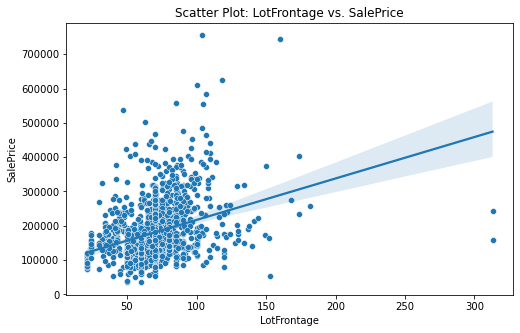

In [56]:
# Plotting the scatter plot for "LotFrontage" with linear regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=all_data)
sns.regplot(x='LotFrontage', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: LotFrontage vs. SalePrice')
plt.show()

In [57]:
# Deleting outliers based on the displayed plot
all_data = all_data[all_data['LotFrontage'] <= 200]
print(all_data.shape)

(1458, 70)


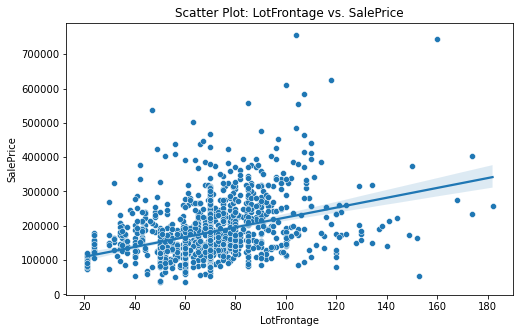

In [58]:
# Plotting Again After removing Outliers
# Plotting the scatter plot for "LotFrontage" with linear regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=all_data)
sns.regplot(x='LotFrontage', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: LotFrontage vs. SalePrice')
plt.show()

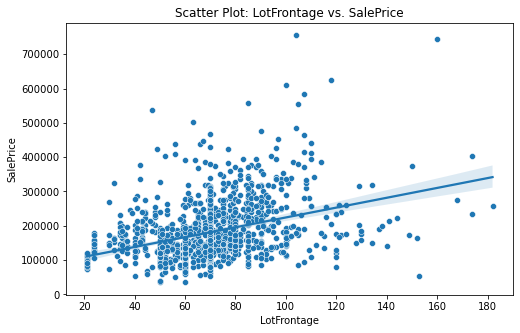

In [59]:
# Plotting the scatter plot for "LotFrontage" after deleting outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=all_data)
sns.regplot(x='LotFrontage', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: LotFrontage vs. SalePrice')
plt.show()

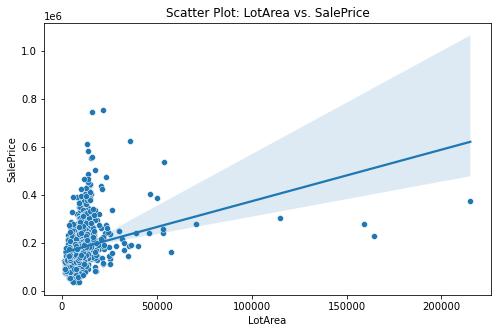

(1448, 70)


In [60]:
# Plotting the scatter plot for "LotArea"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LotArea', y='SalePrice', data=all_data)
sns.regplot(x='LotArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: LotArea vs. SalePrice')
plt.show()

# Deleting outliers for "LotArea" and plotting again
all_data = all_data[all_data['LotArea'] <= 50000]
print(all_data.shape)

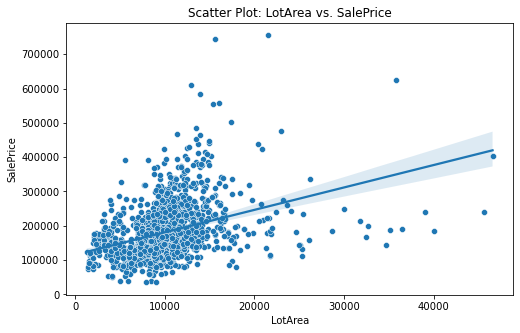

In [61]:
# Plotting Again After removing Outliers

# Plotting the scatter plot for "LotArea"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LotArea', y='SalePrice', data=all_data)
sns.regplot(x='LotArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: LotArea vs. SalePrice')
plt.show()

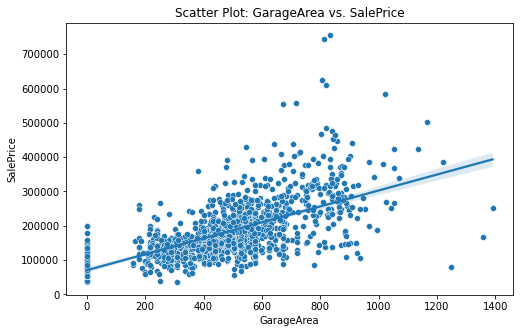

In [62]:
# Plotting the scatter plot for "GarageArea"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GarageArea', y='SalePrice', data=all_data)
sns.regplot(x='GarageArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: GarageArea vs. SalePrice')
plt.show()


In [63]:
# Deleting outliers for "GarageArea" and plotting again
all_data = all_data[all_data['GarageArea'] <= 1200]
print(all_data.shape)

(1444, 70)


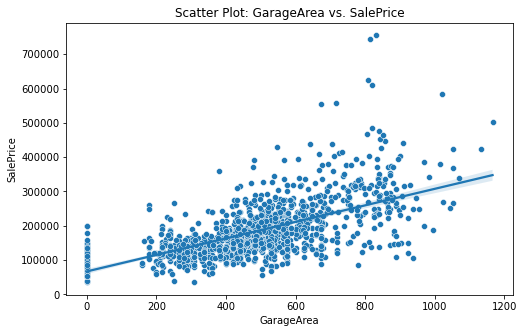

In [64]:
# Plotting Again After removing Outliers

plt.figure(figsize=(8, 5))
sns.scatterplot(x='GarageArea', y='SalePrice', data=all_data)
sns.regplot(x='GarageArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: GarageArea vs. SalePrice')
plt.show()

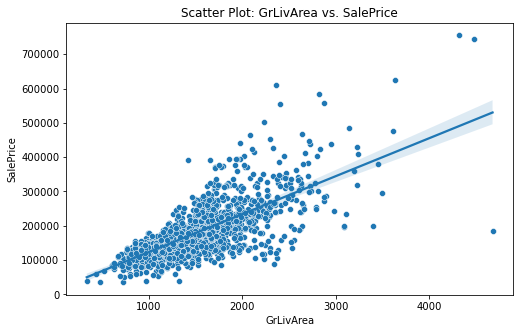

In [65]:
# Plotting the scatter plot for "GrLivArea"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=all_data)
sns.regplot(x='GrLivArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: GrLivArea vs. SalePrice')
plt.show()

In [66]:
# Deleting outliers for "GrLivArea" and plotting again
all_data = all_data[all_data['GrLivArea'] <= 3500]
print(all_data.shape)

(1439, 70)


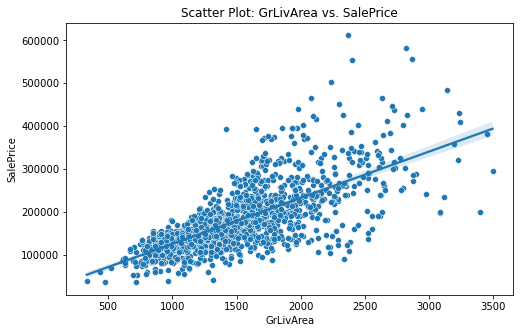

In [67]:
# Plotting Again After removing Outliers

# Plotting the scatter plot for "GrLivArea"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=all_data)
sns.regplot(x='GrLivArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: GrLivArea vs. SalePrice')
plt.show()

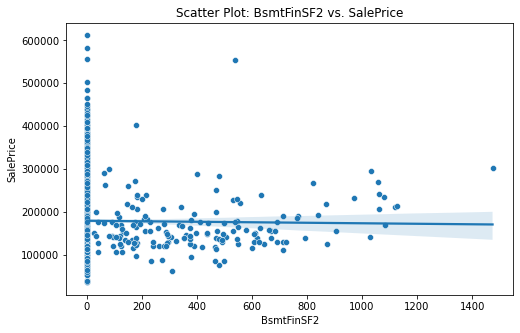

In [68]:
# Plotting the scatter plot for "BsmtFinSF2"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=all_data)
sns.regplot(x='BsmtFinSF2', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: BsmtFinSF2 vs. SalePrice')
plt.show()

In [69]:
# the plot shows that we have a lot of houses, which the value of their BsmtFinSF2 are 0

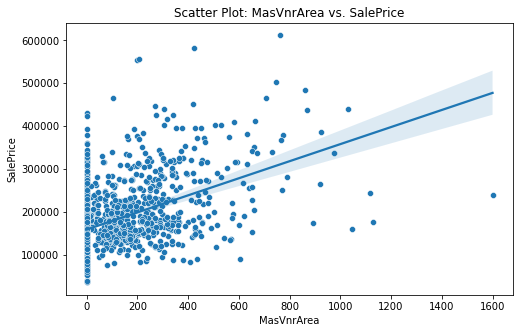

In [70]:
# Plotting the scatter plot for "MasVnrArea"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=all_data)
sns.regplot(x='MasVnrArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: MasVnrArea vs. SalePrice')
plt.show()

In [71]:
# Deleting outliers for "MasVnrArea" and plotting again
all_data = all_data[all_data['MasVnrArea'] <= 1000]
print(all_data.shape)

(1434, 70)


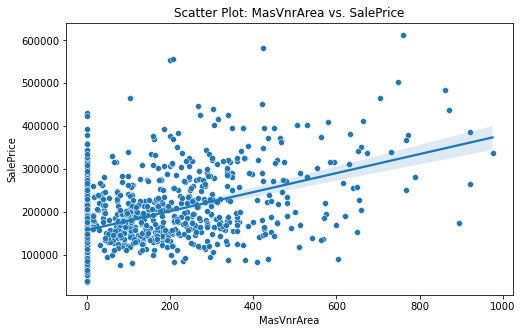

In [72]:
# Plotting the scatter plot for "MasVnrArea"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=all_data)
sns.regplot(x='MasVnrArea', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: MasVnrArea vs. SalePrice')
plt.show()

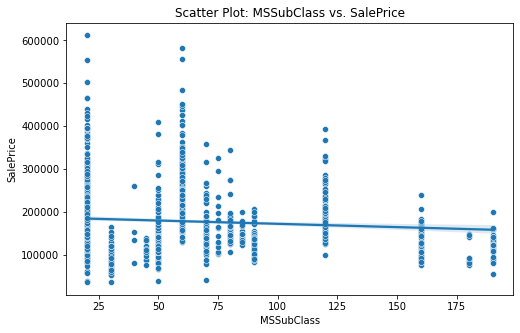

In [73]:
# Plotting the scatter plot for "MSSubClass"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MSSubClass', y='SalePrice', data=all_data)
sns.regplot(x='MSSubClass', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: MSSubClass vs. SalePrice')
plt.show()

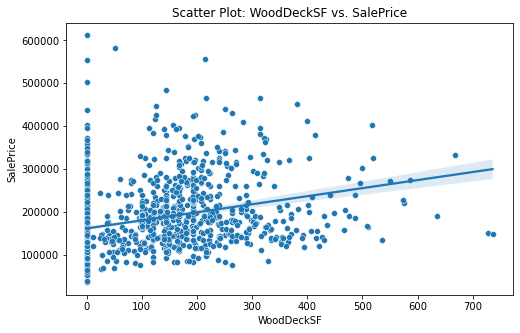

In [74]:
# Plotting the scatter plot for "WoodDeckSF"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=all_data)
sns.regplot(x='WoodDeckSF', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: WoodDeckSF vs. SalePrice')
plt.show()

In [75]:
# Deleting outliers for "WoodDeckSF" and plotting again
all_data = all_data[all_data['WoodDeckSF'] <= 600]
print(all_data.shape)

(1430, 70)


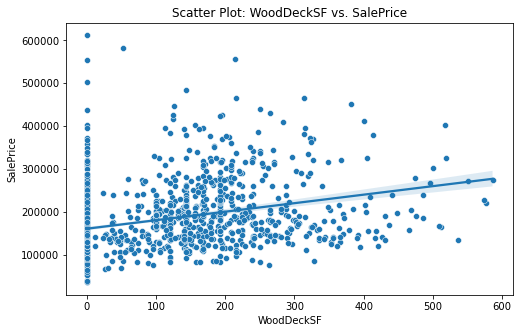

In [76]:
# Plotting the scatter plot for "WoodDeckSF"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=all_data)
sns.regplot(x='WoodDeckSF', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: WoodDeckSF vs. SalePrice')
plt.show()

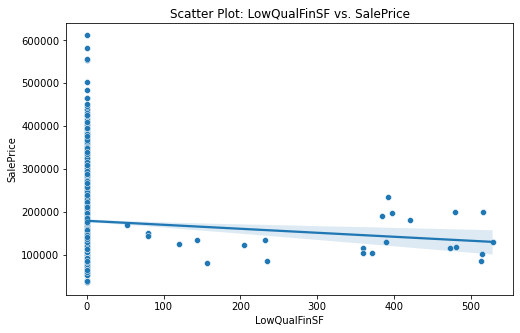

In [77]:
# Plotting the scatter plot for "LowQualFinSF"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=all_data)
sns.regplot(x='LowQualFinSF', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: LowQualFinSF vs. SalePrice')
plt.show()

In [78]:
# the plot shows that we have a lot of houses, which the value of their LowQualFinSF are 0

# LowQualFinSF : Low quality finished square feet (all floors)

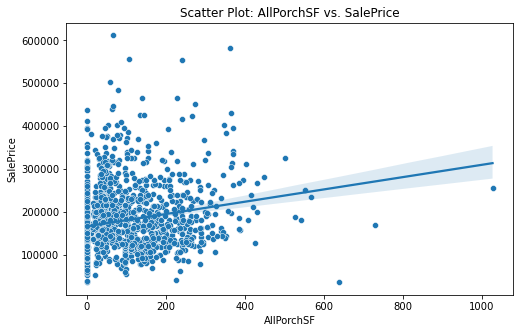

In [79]:
# Plotting the scatter plot for "AllPorchSF"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AllPorchSF', y='SalePrice', data=all_data)
sns.regplot(x='AllPorchSF', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('AllPorchSF')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: AllPorchSF vs. SalePrice')
plt.show()

In [80]:
# Deleting outliers for "AllPorchSF" and plotting again
all_data = all_data[all_data['AllPorchSF'] <= 600]
print(all_data.shape)

(1427, 70)


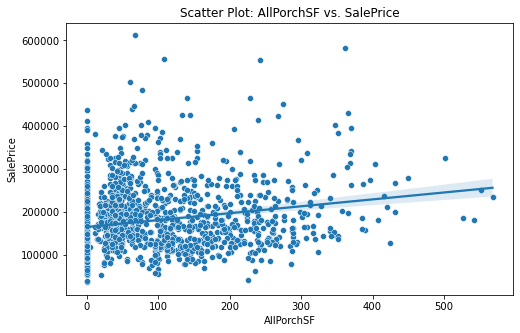

In [81]:
# Plotting the scatter plot for "AllPorchSF"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AllPorchSF', y='SalePrice', data=all_data)
sns.regplot(x='AllPorchSF', y='SalePrice', data=all_data, scatter=False)
plt.xlabel('AllPorchSF')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: AllPorchSF vs. SalePrice')
plt.show()

###  -------------  7.4.   Forth Step:  Split dataset to numeric and categorical -----------


In [82]:
# Create a last datasets (categorical_data, numeric_data, ...) based on selected feature names

original_cat_dataset = all_data[feature_names_OCD]
print(original_cat_dataset.shape)

categorical_data = all_data[feature_names_CD]
print(categorical_data.shape)

numeric_data = all_data[feature_names_ND]
print(numeric_data.shape)

(1427, 14)
(1427, 34)
(1427, 22)


In [83]:
# here numeric_data contains the 'SalePrice' feature, so we need to separate this feature before 
# any operation on numerical data, because for comparing with last models we keep scale of SalePrice

# Separating 'SalePrice' from numeric_data
SalePrice = numeric_data['SalePrice']
print(len(SalePrice))

numeric_data = numeric_data.drop(columns=['SalePrice'])
print(numeric_data.shape)

1427
(1427, 21)


##  ////////////////////    8.     Data transformation (Log)     //////////////////////// 


### The features in the dataset should conform to the statistical assumptions of the models.??

What does it mean to conform to statistical assumptions? Many models implemented in Sklearn might perform poorly if the numeric features do not more or less follow a standard Gaussian (normal) distribution. Except for tree-based models, the objective function of Sklearn algorithms assumes the features follow a normal distribution.

Actually, using the word assume would be putting things lightly. For models like K-Nearest-Neighbors, feature transformation is a requirement for the algorithm to perform expectedly:



### 'Standardization'
'Standardization' does not change the skew of the distribution. What it does is 
transforming the values so it has μ=0 and σ2=1 . The actual distribution shape remains unchanged.

Standardization is just making the feature zero-mean and unit variance. e.g. if the feature is uniformly distributed, it'll again be uniformly distributed. It's just a linear transform, and it doesn't decrease the skew (i.e. skewness, which is already the third standardized moment).

### 'Log-transformation'
'Log-transformation', on the other hand, changes the skew of the distribution, and is useful when you deal with values that have right-tailed distribution.

Log-transform decreases skew in some distributions, especially with large outliers. But, it may not be useful as well if the original distributed is not skewed. Also, log transform may not be applied to some cases (negative values), but standardization is always applicable (except σ=0
).


In [84]:
#  Detecting the 'skewness' of each numerical feature 

# Since if the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. So  
# this analysis considers Threshold equal to 0.50.

from scipy.stats import skew

# Get numerical features
numerical_feat = numeric_data.select_dtypes(include=[np.number]).columns

# Calculate skewness for each numerical feature
skewed_feats = numeric_data[numerical_feat].apply(lambda x: skew(x.dropna()))

# Select features with skewness greater than 0.50
skewed_feats_name = skewed_feats[skewed_feats > 0.50].index
print(skewed_feats_name)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'AllPorchSF'],
      dtype='object')


In [85]:
# Apply 'log transformation' to skewed features
numeric_data[skewed_feats_name] = np.log1p(numeric_data[skewed_feats_name])

print(numeric_data['LotFrontage'])

0       4.189655
1       4.394449
2       4.234107
3       4.110874
4       4.442651
          ...   
1454    4.143135
1455    4.143135
1456    4.454347
1457    4.204693
1458    4.234107
Name: LotFrontage, Length: 1427, dtype: float64


#  //////////////////   9.    Scaling 'all' numerical data //////////////////////// 


### 9.1    First : Checking 'Normality' of features by  plot 

Text(0.5, 1.0, 'Distribution of LotFrontage')

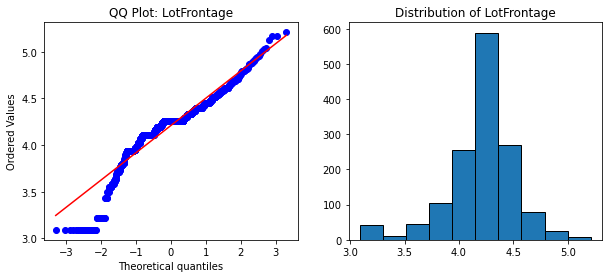

In [86]:
import scipy.stats as stats
import matplotlib.pyplot as plt


# QQ plot and Histogram to assess normality of some features
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
stats.probplot(numeric_data['LotFrontage'], plot=plt)
plt.title('QQ Plot: LotFrontage')

plt.subplot(1, 2, 2)
plt.hist(numeric_data['LotFrontage'], edgecolor='black')
plt.title('Distribution of LotFrontage')



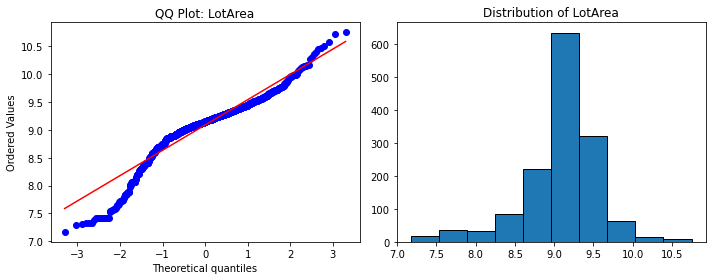

In [87]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
stats.probplot(numeric_data['LotArea'], plot=plt)
plt.title('QQ Plot: LotArea')

plt.subplot(1, 2, 2)
plt.hist(numeric_data['LotArea'], edgecolor='black')
plt.title('Distribution of LotArea')

plt.tight_layout()
plt.show()

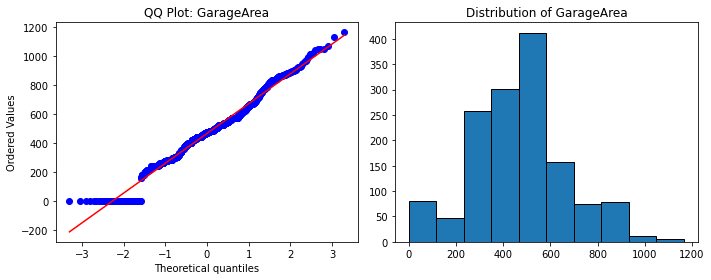

In [88]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
stats.probplot(numeric_data['GarageArea'], plot=plt)
plt.title('QQ Plot: GarageArea')

plt.subplot(1, 2, 2)
plt.hist(numeric_data['GarageArea'], edgecolor='black')
plt.title('Distribution of GarageArea')

plt.tight_layout()
plt.show()


### --------  9.2    Second : Checking 'Normality' of features by function ------


In [89]:
import scipy.stats as stats

numerical_feat2 = numeric_data.columns

# Creating an empty DataFrame to store the results
normality_table = pd.DataFrame(columns=['Feature', 'Statistic', 'P_value'])

# Testing 'Shapiro-Wilk' to test normality of each feature
for feat in numerical_feat2:
    statistic, p_value = stats.shapiro(numeric_data[feat])
    
    # Storing results in the DataFrame
    normality_table = normality_table.append({'Feature': feat, 'Statistic': statistic, 'P_value': p_value}, ignore_index=True)

# Printing the result
print(normality_table)

         Feature  Statistic       P_value
0     MSSubClass   0.867318  3.977609e-33
1    LotFrontage   0.899681  1.438406e-29
2        LotArea   0.916835  2.663321e-27
3      YearBuilt   0.925567  5.268072e-26
4   YearRemodAdd   0.861994  1.207514e-33
5     MasVnrArea   0.701991  1.261169e-44
6     BsmtFinSF1   0.732314  5.366973e-43
7     BsmtFinSF2   0.380230  0.000000e+00
8      BsmtUnfSF   0.692990  4.203895e-45
9    TotalBsmtSF   0.965295  5.414064e-18
10      1stFlrSF   0.996451  2.274074e-03
11      2ndFlrSF   0.664159  0.000000e+00
12  LowQualFinSF   0.109661  0.000000e+00
13     GrLivArea   0.995650  4.060333e-04
14   GarageYrBlt   0.928229  1.380137e-25
15    GarageArea   0.979380  1.976250e-13
16    WoodDeckSF   0.712413  4.484155e-44
17      PoolArea   0.032059  0.000000e+00
18       MiscVal   0.173283  0.000000e+00
19        YrSold   0.896988  6.758725e-30
20    AllPorchSF   0.803244  1.675354e-38


### -----------     9.2    Handling Non-Normal data by Scaling:      ----------


In [90]:
###  -----------      9.3. Scaling all Numerical data   -----------

In [91]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# we write a for loop in order to Loop through each column of numeric_data and scale all columns.

# Iterate over the numeric columns excluding SalePrice
for col in numeric_data.columns:
    numeric_data[col] = StandardScaler().fit_transform(numeric_data[col].values.reshape(-1, 1))



In [92]:
# Checking number of outliers after scaling
num_out_LotF2_scaled = find_outlier(numeric_data['LotFrontage'])
print(num_out_LotF2_scaled)
print(len(num_out_LotF2_scaled))

num_out_LotArea2_scaled = find_outlier(numeric_data['LotArea'])
print(num_out_LotArea2_scaled)
print(len(num_out_LotArea2_scaled))

num_out_GarageArea2_scaled = find_outlier(numeric_data['GarageArea'])
print(num_out_GarageArea2_scaled)
print(len(num_out_GarageArea2_scaled))



[-3.223860138678952, -3.639152755083273, -3.223860138678952, -3.223860138678952, -3.223860138678952, 3.0978233743496952, -3.639152755083273, -3.639152755083273, 3.0978233743496952, -3.639152755083273, -3.639152755083273, -3.639152755083273, -3.639152755083273, -3.223860138678952, -3.639152755083273, -3.639152755083273, -3.639152755083273, -3.223860138678952, -3.223860138678952, -3.639152755083273, -3.639152755083273, -3.639152755083273, -3.223860138678952, -3.223860138678952, -3.223860138678952, -3.639152755083273, -3.639152755083273, -3.223860138678952, -3.223860138678952, -3.223860138678952, -3.639152755083273, -3.639152755083273, -3.639152755083273, -3.639152755083273, -3.223860138678952, -3.223860138678952, -3.223860138678952, 3.2430409653222014, -3.223860138678952, -3.223860138678952, -3.639152755083273, -3.639152755083273, -3.223860138678952, -3.639152755083273, -3.639152755083273]
45
[-3.6136453455210953, -3.017390485035465, -3.5053906680330247, -3.2803800682592983, -3.505390668

In [93]:
# scaling did not effect the number of outliers for these features 
# So scaling does not solve outliers problem in this dataset

In [94]:
# Normality testing after scaling
numerical_feat2 = numeric_data.columns

# Creating an empty DataFrame to store the results
normality_table2 = pd.DataFrame(columns=['Feature', 'Statistic', 'P_value'])

# Testing Shapiro-Wilk to test normality of each feature
for feat in numerical_feat2:
    statistic, p_value = stats.shapiro(numeric_data[feat])
    
    # Storing results in the DataFrame
    normality_table2 = normality_table2.append({'Feature': feat, 'Statistic': statistic, 'P_value': p_value}, ignore_index=True)

# Printing the result
print(normality_table2)

         Feature  Statistic       P_value
0     MSSubClass   0.867318  3.977609e-33
1    LotFrontage   0.899681  1.438406e-29
2        LotArea   0.916835  2.663321e-27
3      YearBuilt   0.925567  5.268072e-26
4   YearRemodAdd   0.861995  1.207542e-33
5     MasVnrArea   0.701992  1.261169e-44
6     BsmtFinSF1   0.732314  5.366973e-43
7     BsmtFinSF2   0.380230  0.000000e+00
8      BsmtUnfSF   0.692990  4.203895e-45
9    TotalBsmtSF   0.965295  5.414064e-18
10      1stFlrSF   0.996451  2.274074e-03
11      2ndFlrSF   0.664159  0.000000e+00
12  LowQualFinSF   0.109661  0.000000e+00
13     GrLivArea   0.995650  4.061878e-04
14   GarageYrBlt   0.928229  1.380206e-25
15    GarageArea   0.979380  1.976250e-13
16    WoodDeckSF   0.712413  4.484155e-44
17      PoolArea   0.032059  0.000000e+00
18       MiscVal   0.173283  0.000000e+00
19        YrSold   0.896988  6.758725e-30
20    AllPorchSF   0.803244  1.675374e-38


In [95]:
# -----------     9.4    Checking again and deleting most skewed data after scaling:     

In [96]:
from scipy.stats import skew
import numpy as np

numerical_feat2 = numeric_data.columns

# Calculate skewness for each numerical feature after scaling
skewness_after_scaling = numeric_data[numerical_feat2].apply(lambda x: skew(x.dropna()))

# Select features with skewness greater than 1
most_skewed_features = skewness_after_scaling[skewness_after_scaling > 1].index
name_most_skewed_features = most_skewed_features.tolist()
print(name_most_skewed_features)

['BsmtFinSF2', 'LowQualFinSF', 'PoolArea', 'MiscVal']


In [97]:
# Plotting most skewed features

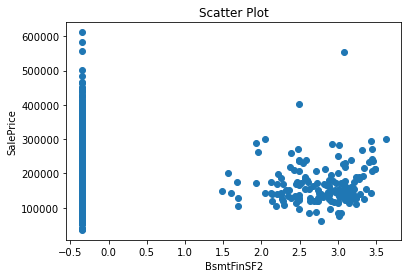

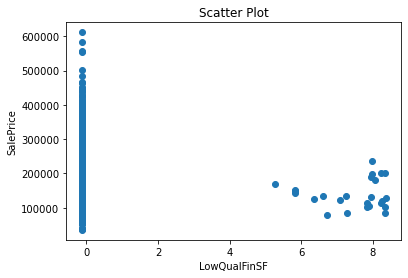

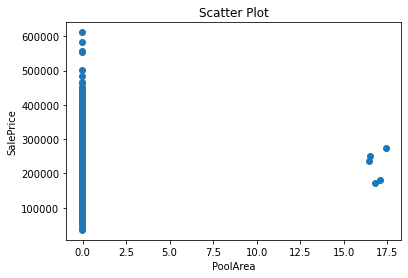

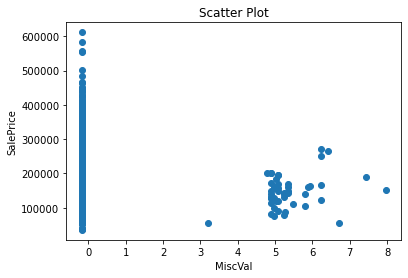

In [98]:
import matplotlib.pyplot as plt

plt.scatter(numeric_data['BsmtFinSF2'], SalePrice)
plt.title('Scatter Plot')
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(numeric_data['LowQualFinSF'], SalePrice)
plt.title('Scatter Plot')
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(numeric_data['PoolArea'], SalePrice)
plt.title('Scatter Plot')
plt.xlabel('PoolArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(numeric_data['MiscVal'], SalePrice)
plt.title('Scatter Plot')
plt.xlabel('MiscVal')
plt.ylabel('SalePrice')
plt.show()


In [99]:
# Deleting high-skewed data from numerical sub-dataset after normalization

skewed_features_to_delete = ["BsmtFinSF2", "LowQualFinSF", "PoolArea", "MiscVal"]
numeric_data = numeric_data.drop(columns=skewed_features_to_delete)

# Displaying the dimensions of the updated numerical sub-dataset
print(numeric_data.shape)

numerical_features_name = numeric_data.columns


(1427, 17)


#  10. Correlation between Numeric_Features  and SlaePrice


### ------- ----    10.1.   First step:  finding correlation and plotting

In [100]:
# Combine 'numeric_data' and 'SalePrice' for correlation calculation

combined_data = pd.concat([numeric_data, SalePrice], axis=1)

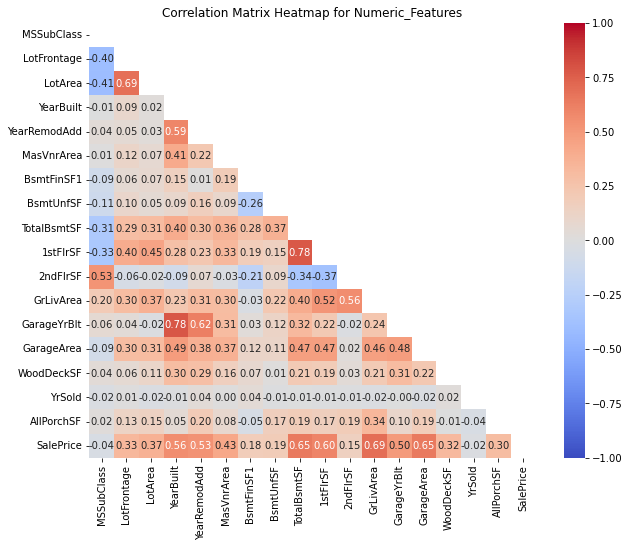

In [101]:
# Compute the correlation matrix
cor_matrix = combined_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(combined_data.corr(), dtype=bool))

# Plotting a heatmap of the correlation matrix for Numeric_Features
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask = mask, vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap for Numeric_Features")
plt.show()

### -------------- 10.2.  Second step:  Multicollinearity  ----------------

### Multicollinearity

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences

In regression analysis, when R-square of the model is very high but there are very few significant t ratios, this shows multicollinearity in the data. 2. High correlation between exploratory variables also indicates the problem of multicollinearity.

Multicollinearity exists when two or more of the predictors in a regression model are moderately or highly correlated with one another. Unfortunately, when it exists, it can wreak havoc on our analysis and thereby limit the research conclusions we can draw.

Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present. Possible for individual regression coefficients to be insignificant but for the overall fit of the equation to be high.
    
It is a measure of multicollinearity in the set of multiple regression variables. The higher the value of VIF the higher correlation between this variable and the rest. If the VIF value is higher than 10, it is usually considered to have a high correlation with other independent variables.

How do you detect multicollinearity?

It is also a useful tool for detection of multicollinearity. If the value of R2 is high (more than 0.8) and a very few regression parameters comes out to be significant (using t- test for individual regression parameters) then multicollinearity is said to be present.


In [102]:
# drop correlated features with correlation bigger than 80%  to avoid Multicollinearity.

In [103]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

# Feature selector that removes all low-variance features.
# This feature selection algorithm looks only at the features (X), not the desired outputs (y)
# , and can thus be used for unsupervised learning.

from sklearn.feature_selection import VarianceThreshold

# Set the threshold for dropping highly correlated features
correlation_threshold = 0.8

# Create a VarianceThreshold instance
correlation_selector = VarianceThreshold(threshold=correlation_threshold)

# Fit the selector to the data (excluding the target variable)
correlation_selector.fit(combined_data.drop(columns=['SalePrice']))

# Get the indices of features to be kept
selected_features_indices = correlation_selector.get_support(indices=True)



In [104]:
# Get the names of features to be kept
selected_features = combined_data.columns[selected_features_indices]
selected_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'YrSold', 'AllPorchSF'],
      dtype='object')

In [105]:
# Create a new DataFrame with selected features
combined_data_no_multicollinearity = combined_data[selected_features]

# Display the selected features
print("Selected Features after Dropping Highly Correlated Features:")
print(selected_features)

Selected Features after Dropping Highly Correlated Features:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'YrSold', 'AllPorchSF'],
      dtype='object')


#  /////////////////      Operation on 'Categorical' Data     ////////////////////


###  /////////////////  11.  Plotting 'categorical' variables -before labeling  //////

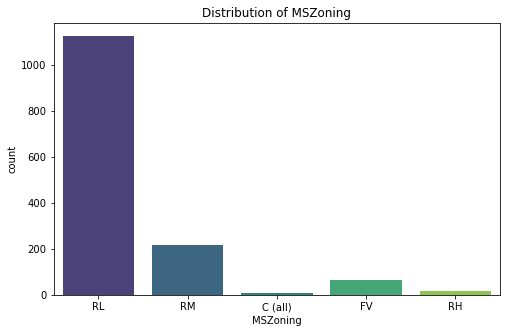

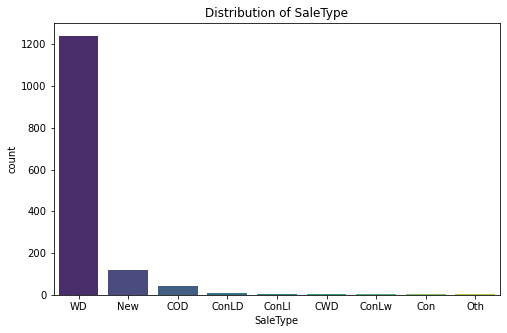

In [106]:
# Get the names of categorical features
cat_features_names = categorical_data.columns

# Plotting 'MSZoning' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='MSZoning', data=categorical_data, palette='viridis')
plt.title("Distribution of MSZoning")
plt.show()

# Plotting 'SaleType' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='SaleType', data=categorical_data, palette='viridis')
plt.title("Distribution of SaleType")
plt.show()

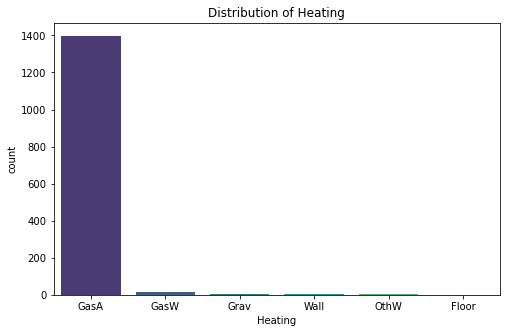

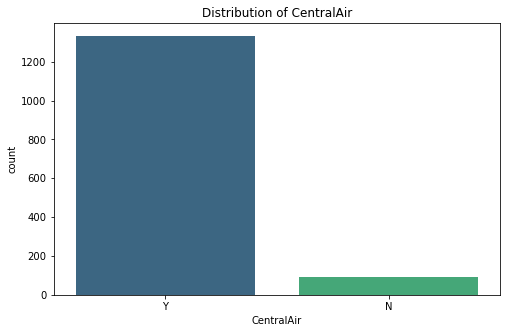

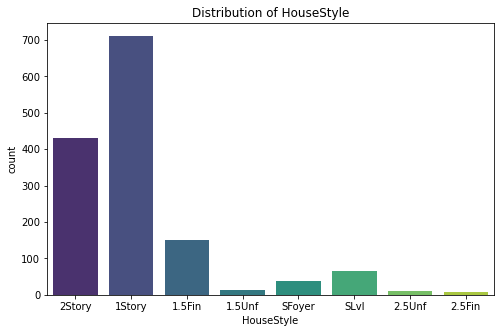

In [107]:
# Plotting 'Heating' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Heating', data=categorical_data, palette='viridis')
plt.title("Distribution of Heating")
plt.show()

# Plotting 'CentralAir' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='CentralAir', data=categorical_data, palette='viridis')
plt.title("Distribution of CentralAir")
plt.show()

# Plotting 'HouseStyle' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='HouseStyle', data=categorical_data, palette='viridis')
plt.title("Distribution of HouseStyle")
plt.show()

#  /////////////////     12.   Encoding Categorical variables -  ////////////////////


In [108]:
# Encoding method converts categorical variables into numerical format to be used in model.

# Two Strategy:
# 1. label Encoding , 
# 2. One-hot Encoding

In [109]:
# --------- 12.1.  First step:  Separating categorical features in two group  ----------------

# Here we Separate our categorical data in two groups, one features with more than four categories (factors)
# and other with less than equal four categories (factors) to avoid dimensionality problem,
# because number of data points in this dataset is small.

In [110]:
# Get unique categories for each column
unique_categories = categorical_data.apply(lambda col: col.unique())
print(unique_categories)


MSZoning                                 [RL, RM, C (all), FV, RH]
Street                                                [Pave, Grvl]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, HLS, Low]
Utilities                                         [AllPub, NoSeWa]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                          [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2           [Norm, Artery, RRNn, Feedr, PosA, RRAn, RRAe]
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle       [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
RoofStyle               [Gable, Hip, Gambrel, Mansard, Flat, Shed]
RoofMatl         [CompShg, Metal, WdShake, Membran, Tar&Grv, Wd...
Exterior1st      [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace,

In [111]:
# Finding features with more than four categories (factors)
unique_catList = unique_categories.apply(lambda x: len(x) > 4)

print(unique_catList)


MSZoning          True
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig         True
LandSlope        False
Neighborhood      True
Condition1        True
Condition2        True
BldgType          True
HouseStyle        True
RoofStyle         True
RoofMatl          True
Exterior1st       True
Exterior2nd       True
MasVnrType       False
ExterQual        False
ExterCond         True
Foundation        True
BsmtExposure     False
BsmtFinType1      True
BsmtFinType2      True
Heating           True
HeatingQC         True
CentralAir       False
Electrical        True
KitchenQual      False
Functional        True
FireplaceQu       True
GarageType        True
PavedDrive       False
SaleType          True
SaleCondition     True
dtype: bool


In [112]:
# Print features with more than four categories

unique_catList[unique_catList].index

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional',
       'FireplaceQu', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [113]:
# Creating sub-dataset for features with more than four categories
unique_catGreater4_data = categorical_data[unique_catList[unique_catList].index]
print(unique_catGreater4_data.shape)

(1427, 23)


In [114]:
# Finding features with less than or equal to four categories (factors)
unique_catLess4 = unique_catList[~unique_catList].index

# Print features with less than or equal to four categories
print(unique_catLess4)

# Creating sub-dataset for features with less than or equal to four categories
unique_catLess4_data = categorical_data[unique_catLess4]
print(unique_catLess4_data.shape)

Index(['Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'MasVnrType', 'ExterQual', 'BsmtExposure', 'CentralAir', 'KitchenQual',
       'PavedDrive'],
      dtype='object')
(1427, 11)


In [115]:
###  12.2.  Second step: 

# transform features with 'ordinal value'  to 'unique_catGreater4' sub-dataset


In [116]:
# Here some features with ordinal value such as:"ExterQual","LotShape", "KitchenQual" are deleted from
# 'unique_catLess4' sub-dataset and then are added to 'unique_catGreater4' sub-dataset to avoid dimentionality.

# Extract features with ordinal values from 'unique_catLess4_data'
df_ordinal_features = unique_catLess4_data[["ExterQual", "LotShape", "KitchenQual"]]

# Remove above features from 'unique_catLess4_data'
unique_catLess4_data = unique_catLess4_data.drop(columns=["ExterQual", "LotShape", "KitchenQual"])

# Add 'ordinal_features' to 'unique_catGreater4_data'
unique_catGreater4_data = pd.concat([unique_catGreater4_data, df_ordinal_features], axis=1)

# Print dimensions
print(df_ordinal_features.shape)
print(unique_catLess4_data.shape)
print(unique_catGreater4_data.shape)

(1427, 3)
(1427, 8)
(1427, 26)


In [117]:
# -------------   12.3.  Third step:    Encoding     ---------


In [118]:
# ---------------------  12.3.1.    Label Encoding ----------------

#  label encoding is applied on features with more than 4 categories and some 
# ordinal data with less than four features:

In [119]:
unique_catGreater4_data.shape

(1427, 26)

In [120]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Implementing Label Encoding on all features with a for loop
for column in unique_catGreater4_data.columns:
    unique_catGreater4_data[column] = label_encoder.fit_transform(unique_catGreater4_data[column])


In [121]:
unique_catGreater4_data.shape

(1427, 26)

In [122]:
unique_catGreater4_data.head()

,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,...,HeatingQC,Electrical,Functional,FireplaceQu,GarageType,SaleType,SaleCondition,ExterQual,LotShape,KitchenQual
0,3,4,5,2,2,0,5,1,0,12,...,0,4,6,2,1,8,4,2,3,2
1,3,2,24,1,2,0,2,1,0,8,...,0,4,6,4,1,8,4,3,3,3
2,3,4,5,2,2,0,5,1,0,12,...,0,4,6,4,1,8,4,2,0,2
3,3,0,6,2,2,0,5,1,0,13,...,2,4,6,2,5,8,0,3,0,2
4,3,2,15,2,2,0,5,1,0,12,...,0,4,6,4,1,8,4,2,0,2


In [123]:
unique_catGreater4 = unique_catGreater4_data.columns
unique_catGreater4

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional',
       'FireplaceQu', 'GarageType', 'SaleType', 'SaleCondition', 'ExterQual',
       'LotShape', 'KitchenQual'],
      dtype='object')

In [124]:
# I removed the features with categorical data which have more than 4 category from the
# original 'categorical_data' dataset, then "replace" the new Encoding features.

categorical_data[unique_catGreater4] = unique_catGreater4_data[unique_catGreater4]

# Print the modified 'unique_catGreater4_data'
print(unique_catGreater4_data)

      MSZoning  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0            3          4             5           2           2         0   
1            3          2            24           1           2         0   
2            3          4             5           2           2         0   
3            3          0             6           2           2         0   
4            3          2            15           2           2         0   
...        ...        ...           ...         ...         ...       ...   
1454         1          4            21           2           2         0   
1455         3          4             8           2           2         0   
1456         3          4            14           2           2         0   
1457         3          4             6           2           2         0   
1458         3          4            12           2           2         0   

      HouseStyle  RoofStyle  RoofMatl  Exterior1st  ...  HeatingQC  \
0    

C:\Users\shoja\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [125]:
# ---------------  12.3.2.    One-hot Encoding ----------------

# we apply one-hot encoding on features with less than equal 4 categories.


In [126]:
from sklearn.preprocessing import OneHotEncoder

# Create dummy variables using OneHotEncoder
encoder = OneHotEncoder(sparse=False)

onehot_encoded_data = encoder.fit_transform(unique_catLess4_data)


C:\Users\shoja\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [127]:
onehot_encoded_data[0]

array([0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1.])

In [128]:
# pip install -U scikit-learn

In [129]:
encoded_columns = encoder.get_feature_names_out(unique_catLess4_data.columns)

In [130]:
encoded_data = pd.DataFrame(onehot_encoded_data, columns=encoded_columns)

In [131]:
encoded_data.head()

,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,...,MasVnrType_Stone,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [132]:
# Remove original categorical features from 'categorical_data' sub-dataset
categorical_data = categorical_data.drop(columns=unique_catLess4)
categorical_data.shape

(1427, 23)

In [133]:
# ---------------  12.3.3.    Concatenating Encoded data ----------------

In [134]:
# Concatenate the encoded data with 'categorical_data' sub-dataset
categorical_data = pd.concat([categorical_data, encoded_data], axis=1)

# Print the dimensions of the datasets
print(categorical_data.shape)
print(numeric_data.shape)
print(original_cat_dataset.shape)

(1459, 47)
(1427, 17)
(1427, 14)


#   13.  Merging numerical and categorical sub-datasets into one dataset  


In [135]:
# Adding  all datasets together. Specially "original_cat_dataset" dataset which was separated in the first steps

# Assuming 'original_cat_dataset', 'categorical_data', and 'numeric_data' are pandas DataFrames

# Concatenate all datasets together
all_data = pd.concat([original_cat_dataset, categorical_data, numeric_data], axis=1)

# Adding Target variable ('SalePrice') to dataset
all_data['SalePrice'] = SalePrice

# Print the dimensions of the resulting dataset
print(all_data.shape)

(1459, 79)


## ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [136]:
#remove rows with any values that are not finite
all_data = all_data[np.isfinite(all_data).all(1)]

#view updated DataFrame
print(all_data.shape)

(1395, 79)


#   ///////////////    14. Splitting data to train and test data  ////////////////////


In [137]:
from sklearn.model_selection import train_test_split

# Set a seed for reproducibility
seed = 123

# Splitting the data into train and test. 80% of the sample size
train_data, test_data, train_label, test_label = train_test_split(
    all_data.drop("SalePrice", axis=1),  # Features
    all_data["SalePrice"],  # Target variable
    test_size=0.2,
    random_state=seed
)

# Print the shape of the resulting datasets
print("Train Data Shape:", train_data.shape)
print("Train Label Shape:", train_label.shape)
print("Test Data Shape:", test_data.shape)
print("Test Label Shape:", test_label.shape)

Train Data Shape: (1116, 78)
Train Label Shape: (1116,)
Test Data Shape: (279, 78)
Test Label Shape: (279,)


In [138]:
# Print the shape of the resulting datasets
print("Train Data Shape:", train_data.dtypes)

Train Data Shape: TotalBath       float64
OverallQual     float64
OverallCond     float64
BedroomAbvGr    float64
TotRmsAbvGrd    float64
                 ...   
GarageYrBlt     float64
GarageArea      float64
WoodDeckSF      float64
YrSold          float64
AllPorchSF      float64
Length: 78, dtype: object


In [139]:
print("Train Label Shape:", train_label.dtypes)


Train Label Shape: float64


In [140]:
print("Test Data Shape:", test_data.dtypes)


Test Data Shape: TotalBath       float64
OverallQual     float64
OverallCond     float64
BedroomAbvGr    float64
TotRmsAbvGrd    float64
                 ...   
GarageYrBlt     float64
GarageArea      float64
WoodDeckSF      float64
YrSold          float64
AllPorchSF      float64
Length: 78, dtype: object


In [141]:
print("Test Label Shape:", test_label.dtypes)

Test Label Shape: float64


# ///////////    15. Model Fitting   ///////////


# ------------------- 15. 1.  Linear Regression      --------

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns

# Assuming 'train_data' is a pandas DataFrame and 'train_label' is a pandas Series
# Assuming 'test_data' is a pandas DataFrame and 'test_label' is a pandas Series

# Convert data to numpy arrays
x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values

# Creating a linear regression model
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)

# Summary
coefficients = pd.DataFrame({'Variable': train_data.columns, 'Coefficient': lm_model.coef_})
intercept = pd.DataFrame({'Variable': ['Intercept'], 'Coefficient': [lm_model.intercept_]})
model_summary = pd.concat([intercept, coefficients], ignore_index=True)

print(model_summary)


        Variable   Coefficient
0      Intercept  1.924499e+17
1      TotalBath  5.754453e+03
2    OverallQual  1.134929e+04
3    OverallCond  7.185650e+03
4   BedroomAbvGr -9.425036e+03
..           ...           ...
74   GarageYrBlt  1.855447e+03
75    GarageArea  6.355217e+03
76    WoodDeckSF  2.598296e+03
77        YrSold -2.285574e+03
78    AllPorchSF -1.121140e+03

[79 rows x 2 columns]


In [143]:
# ---------- Make predictions with test data -----------

predictions = lm_model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Value:", r_squared)


results = pd.DataFrame({'Actual_data': y_test, 'Predicted_data': predictions})

Mean Squared Error (MSE): 972835225.7670251
Root Mean Squared Error (RMSE): 31190.306599439275
R-squared Value: 0.8419157873283676


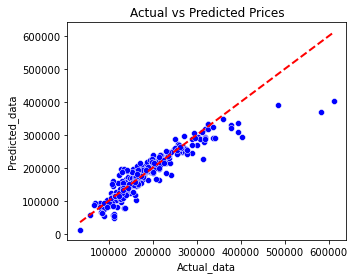

In [144]:
# Visualize the predictions

# Plotting the scatter plot of 'actual' vs 'predicted' values
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Actual_data', y='Predicted_data', data=results, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual_data")
plt.ylabel("Predicted_data")
plt.title("Actual vs Predicted Prices")
plt.show()

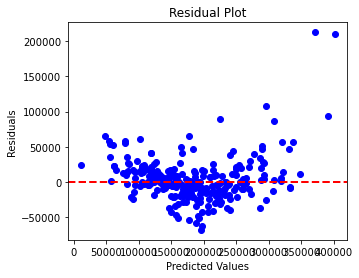

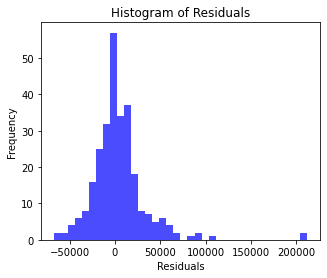

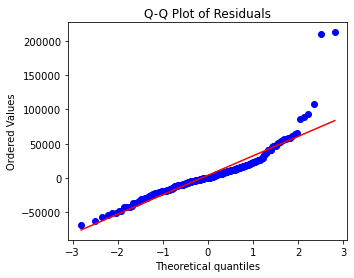

Shapiro-Wilk Test - Statistic: 0.8322703838348389
Shapiro-Wilk Test - P-value: 1.0632422760312478e-16
Durbin-Watson Statistic: 2.0522528213126314


In [145]:
# ------------ Residual analysis  ------------

residuals = y_test - predictions

# Residual plot
plt.figure(figsize=(5, 4))
plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(5, 4))
plt.hist(residuals, bins='auto', color='blue', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot of the residuals
plt.figure(figsize=(5, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk Test - Statistic:", shapiro_stat)
print("Shapiro-Wilk Test - P-value:", shapiro_p_value)

# Durbin-Watson test for autocorrelation
durbin_watson_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", durbin_watson_stat)

# ------------------- 15. 2.  Lasso Regression      --------

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

#  data is called 'all_data'

# Replace the column names with the actual column names in your dataset
# Convert data to numpy arrays
x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values


# Initialize and fit the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter based on your needs
lasso_model.fit(x_train, y_train)

# Make predictions with test data
predictions = lasso_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
rsquared = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Value:", rsquared)
print('\n')

# Display the coefficients
coefficients = pd.DataFrame({'Variable': train_data.columns, 'Coefficient': lasso_model.coef_})
intercept = pd.DataFrame({'Variable': ['Intercept'], 'Coefficient': [lasso_model.intercept_]})
model_summary = pd.concat([intercept, coefficients], ignore_index=True)

print("Model Coefficients:")
print(model_summary)

Mean Squared Error (MSE): 964121556.3947729
Root Mean Squared Error (RMSE): 31050.306864744074
R-squared Value: 0.8433317450627387


Model Coefficients:
        Variable   Coefficient
0      Intercept  49458.018907
1      TotalBath   5752.646279
2    OverallQual  12179.864448
3    OverallCond   6727.551162
4   BedroomAbvGr -10486.474295
..           ...           ...
74   GarageYrBlt   1303.858309
75    GarageArea   6959.582740
76    WoodDeckSF   1795.980251
77        YrSold  -1145.257644
78    AllPorchSF   -652.979626

[79 rows x 2 columns]


# ------------------- 15. 3.  Lasso Regression with Cross-Validation     --------

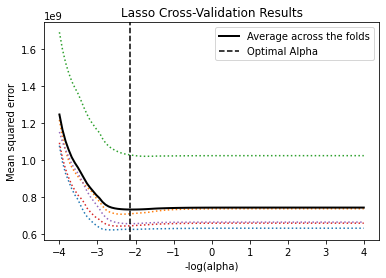

Mean Squared Error (MSE): 969079221.7323021
Root Mean Squared Error (RMSE): 31130.037290891607
R-squared: 0.842526132148224


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'train_data' is a pandas DataFrame and 'train_label' is a pandas Series
# Assuming 'test_data' is a pandas DataFrame and 'test_label' is a pandas Series

# Convert data to numpy arrays
x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values

# Perform k-fold cross-validation to find the optimal lambda value (alpha=1 corresponds to Lasso)
lasso_model = LassoCV(cv=5, random_state=123, alphas=np.logspace(-4, 4, 100), max_iter=10000)
lasso_model.fit(x_train, y_train)

# Plot the cross-validation results
m_log_alphas = -np.log10(lasso_model.alphas_)

plt.figure()
plt.plot(m_log_alphas, lasso_model.mse_path_, ':')
plt.plot(m_log_alphas, lasso_model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_model.alpha_), linestyle='--', color='k', label='Optimal Alpha')
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Lasso Cross-Validation Results') 
plt.legend()
plt.show()

# Find the optimal lambda value based on cross-validation that minimizes test MSE
best_lambda = lasso_model.alpha_

# Find coefficients of the best model
best_model = Lasso(alpha=best_lambda, max_iter=10000)
best_model.fit(x_train, y_train)

# Test data predictions
y_pred_lasso = best_model.predict(x_test)

# Evaluation metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r_squared_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared:", r_squared_lasso)

# --------------- 16.3. Ridge Regression     --------

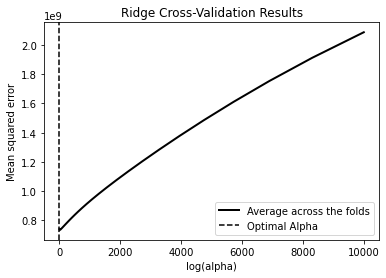

Mean Squared Error (MSE): 961535165.6593665
Root Mean Squared Error (RMSE): 31008.63050280303
R-squared: 0.84375202953871


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'train_data' is a pandas DataFrame and 'train_label' is a pandas Series
# Assuming 'test_data' is a pandas DataFrame and 'test_label' is a pandas Series

# Convert data to numpy arrays
x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values

# Perform k-fold cross-validation to find the optimal lambda value (alpha=0 corresponds to Ridge)
ridge_model = RidgeCV(alphas=np.logspace(-4, 4, 100), store_cv_values=True)
ridge_model.fit(x_train, y_train)

# Plot the cross-validation results
plt.figure()
plt.plot(np.logspace(-4, 4, 100), ridge_model.cv_values_.mean(axis=0), 'k', label='Average across the folds', linewidth=2)
plt.axvline(np.log10(ridge_model.alpha_), linestyle='--', color='k', label='Optimal Alpha')
plt.xlabel('log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Ridge Cross-Validation Results')
plt.legend()
plt.show()

# Find the optimal lambda value based on cross-validation that minimizes test MSE
best_lambda = ridge_model.alpha_

# Find coefficients of the best model
best_model = Ridge(alpha=best_lambda)
best_model.fit(x_train, y_train)

# Test data predictions
y_pred_ridge = best_model.predict(x_test)

# Evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r_squared_ridge = r2_score(y_test, y_pred_ridge)

print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared:", r_squared_ridge)

# --------------- 16.4. Decision Tree Regression     --------


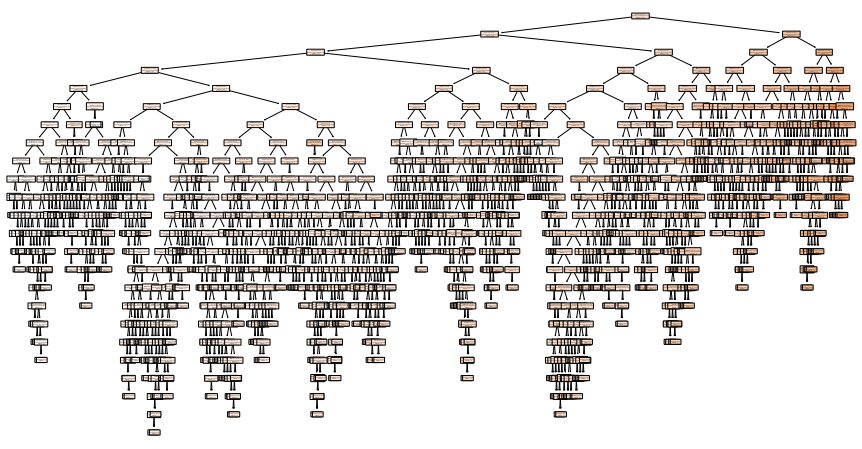

Mean Squared Error (MSE): 1711338061.516129
Root Mean Squared Error (RMSE): 41368.321956735555
R-squared: 0.7219102239472538


In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Convert data to numpy arrays
x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values

# Creating a Decision Tree Regressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(x_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(regressor_dt, filled=True, feature_names=train_data.columns, rounded=True)
plt.show()

# Making predictions
y_pred_dt = regressor_dt.predict(x_test)

# Evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r_squared_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared:", r_squared_dt)

# --------------- 16.5. Random Forest Regression     --------


In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values

# Creating a Random Forest Regressor
regressor_RF = RandomForestRegressor(n_estimators=1000, random_state=123)
regressor_RF.fit(x_train, y_train)

# Making predictions
y_pred_RF = regressor_RF.predict(x_test)

# Evaluation metrics
mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = np.sqrt(mse_RF)
r_squared_RF = r2_score(y_test, y_pred_RF)

print("Mean Squared Error (MSE):", mse_RF)
print("Root Mean Squared Error (RMSE):", rmse_RF)
print("R-squared:", r_squared_RF)

Mean Squared Error (MSE): 751894347.8795435
Root Mean Squared Error (RMSE): 27420.69196573171
R-squared: 0.8778183367043769


# --------------- 16.6. support vector Regression     --------


In [151]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values

# Creating a Support Vector Regressor with Radial basis function (RBF) kernel
svm_model = SVR(kernel='rbf', gamma=0.002, C=1.0, epsilon=0.1)
svm_model.fit(x_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(x_test)

# Evaluation metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r_squared_svm = r2_score(y_test, y_pred_svm)

print("Mean Squared Error (MSE):", mse_svm)
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("R-squared:", r_squared_svm)

Mean Squared Error (MSE): 6753694015.754613
Root Mean Squared Error (RMSE): 82180.86161482254
R-squared: -0.09746478419703597


# --------------- 16.7. Gradient Boosting    --------


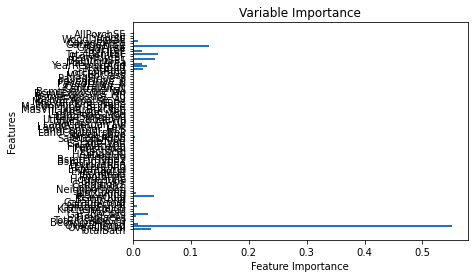

Mean Squared Error (MSE): 643223084.7578529
Root Mean Squared Error (RMSE): 25361.84308676822
R-squared Value: 0.8954772481167176


In [153]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x_train = train_data.values
y_train = train_label.values
x_test = test_data.values
y_test = test_label.values

# Fitting the Gradient Boosting model
gbm_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.005,
    max_depth=4,
    loss='squared_error',  # 
    random_state=42
)

gbm_model.fit(x_train, y_train)

# Plotting Variable Importance
feature_importance = gbm_model.feature_importances_
feature_names = train_data.columns

plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Variable Importance')
plt.show()

# Predictions
predictions = gbm_model.predict(x_test)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, predictions)
rmse_gbm = mean_squared_error(y_test, predictions, squared=False)
rsquared_gbm = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse_gbm)
print("Root Mean Squared Error (RMSE):", rmse_gbm)
print("R-squared Value:", rsquared_gbm)